# 1. Overview Of Linear Algebra

In the last course, we explored the framework of calculus and used it to:

* understand the slope of linear functions
* understand the derivative (slope as a function) of nonlinear functions
* find extreme values in nonlinear functions

* Specifically, we'll explore the framework of **linear algebra**, which provides a way to represent and understand the solutions to **systems of linear equations**. 

**A system of linear equations consists of multiple, related functions with a common set of variables. The word linear equation is often used interchangeably with linear function**

**Optimal Salary Problem**

Let's say we have to pick between 2 different job offers. The first job offer has a  base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as $y=1000+30x$, where $y$ represents dollars earned that week and  $x$ represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as $y=100+50x$, where $y$ also represents dollars earned that week and $x$ also represents hours worked that week.

We want to understand which job offer is better.

Instead, if we want to understand:

At what number of hours worked can we expect to make the same amount of money at either job?

How many hours do we have to work to make more money at the first job than the second job?

## TODO:
* Use numpy.linspace() to generate 1000, evenly spaced values between 0 and 50 and assign to x.
* Transform x using the equation $y=1000+30x$ and assign the result to y1.
* Transform x using the equation $y=100+50x$ and assign the result to y2.
* Generate 2 line plots on the same subplot:
* One with x on the x-axis and y1 on the y-axis. Set the line color to "orange".
* One with x on the x-axis and y2 on the y-axis. Set the line color to "blue".
* Skip selecting a value range for the x and y axes, and instead let matplotlib automatically select based on the data.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

x=np.linspace(0,50,1000)
y1=1000+30*x
y2=100+50*x

plt.plot(x,y1,c='orange')
plt.plot(x,y2,c='blue')
plt.xlabel('Working hours')
plt.ylabel('salary earned')

Text(0, 0.5, 'salary earned')

This **point where both equations intersect is known as a solution to the system,** because substituting for $X$ and $Y$ into both functions in the system makes both of them true. Said another way, plugging in the  value of the solution into both functions yields the same  value.

# 2. Solving Linear Systems By Elimination

Because both functions share the same variables, we can represent one of the variables, say ,$y$ in terms of the other variable and solve for the $x$ value. Then, we can substitute this $x$ value into either equation to determine the $y$ value. This process is known as **solving by elimination or the elimination method.** 

* While we can solve a linear system like this by hand using arithmetic, we can't use the same technique to solve much more complex systems.**Many real world systems are modeled using many more than 2 variables and functions and solving by hand is unfeasible.**

### Those types of systems can be solved using linear algebra using a variation of arithmetic elimination called `Gaussian elimination.`

# 3. Representing Functions In General Form

* Linear algebra provides a way to represent a **`linear system compactly, known as a matrix, and a set of rules for manipulating that representation, also known as an algebra`**. A matrix uses rows and columns to **`represent only the coefficients in a linear system`** and it's similar to the way data is represented in a spreadsheet or a dataframe. Before we can represent our system in a matrix, **`we need to rearrange each of our functions into the general form`**

* In the last course, we primarily explored linear functions in **slope-intercept form:**
### $y=mx+b$

* In linear algebra, we usually represent linear functions in the **general form:**
### $Ax+By=C$

* In an **augmented matrix,** the coefficients from the left sides of the functions are on the left side of the bar (|), while the constants from the right sides of the functions are on the right side. An augmented matrix allows us to represent a linear system using just the real number coefficients and constants.

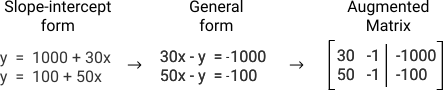

In [2]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/160/equation_to_matrix.svg')

# 4. Representing An Augmented Matrix In NumPy

* To represent an augmented matrix, we can use the **`numpy.asarray()`** function and pass in each row as a list, from the top row to the bottom row

* Because we'll be performing addition, subtraction, multiplication, and division operations using the values in this matrix, we need to **set the type to float32** to preserve precision

## TODO:
* Create a NumPy 2D array representation of our augmented matrix:
$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$
* Assign the resulting numpy.ndarray object to matrix_one.

In [3]:
matrix_one=np.asarray([[30,-1,-1000],[50,-1,-100]],dtype=np.float)
matrix_one

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]])

# 5. Matrix Representation Of The Solution

*  Earlier in the mission, we used arithmetic to calculate the solution to the system and represented it as a coordinate pair: $(45,2350)$. Here's how we represent the solution when we're working with the matrix representation:
$\left[\begin{array}{rr|r}
1 & 0 & 45 \\ 
0 & 1 & 2350
\end{array}\right]$

**To solve a linear system, we need to perform a series of transformations to try to evolve the matrix into this form (where the solution is presented). Not all linear systems have solutions**

# 6. Row Operations

### we can only use the following row operations:

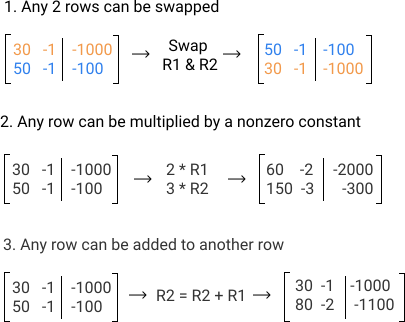

In [4]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/160/matrix_row_operations.svg')

**To swap 2 rows in a NumPy ndarray object, we need to use double bracket notation to specify the row ordering change:**

In [5]:
matrix =  np.asarray([
    [1, 3],
    [50, 2]  
], dtype=np.float32)
# Swap the second row (at index value 1) with the first row (at index value 0).
matrix = matrix[[1,0]]
matrix

array([[50.,  2.],
       [ 1.,  3.]], dtype=float32)

**To multiply a row by a nonzero constant, we select the row, use the * operator to multiply all of the values by a scalar value, and then assign the transformed row back:**

In [6]:
# Multipy the second row by 2.
matrix[1] = 2*matrix[1]
matrix

array([[50.,  2.],
       [ 2.,  6.]], dtype=float32)

**To add one row to another row, we need to add both rows then assign it back to the row we want to overwrite:**

In [7]:
# Add the second row to the first row.
matrix[1] = matrix[1] + matrix[0]
matrix

array([[50.,  2.],
       [52.,  8.]], dtype=float32)

## TODO:
Divide the first row from matrix_one by 30.

In [8]:
matrix_one = np.asarray([
    [30, -1, -500],
    [50, -1, -100]  
], dtype=np.float32)

matrix_one[0]=matrix_one[0]/30
matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -1.6666666e+01],
       [ 5.0000000e+01, -1.0000000e+00, -1.0000000e+02]], dtype=float32)

# 7. Simplifying Matrix To Echelon Form

To find the solutions of a matrix, there are 2 main steps we need to take. The first step is to rearrange the matrix into echelon form. **In this form, the values on the diagonal locations are all equal to $1$ and the values below the diagonal are all equal to $0$.**

$\left[\begin{array}{rr|r}
1 & ? & ? \\ 
0 & 1 & ?
\end{array}\right]$

# 8. Row Reduced Echelon Form

* The second step is to rearrange the matrix into row reduced echelon form. 

$\left[\begin{array}{rr|r}
1 & 0 & ? \\ 
0 & 1 & ?
\end{array}\right]$

* The two question marks (?), which we still need to determine, represent the $x$ and $y$ values that solve our system. 

## TODO:
Transform matrix_three into echelon form and display using the print() function.

In [9]:
matrix_three = np.asarray([
    [1, -1/30, -1000/30],
    [0, 1, 2350]  
], dtype=np.float32)

# operation 1
matrix_three[0]=matrix_three[0]+(1/30)*matrix_three[1]
print(matrix_three)

[[1.0000000e+00 0.0000000e+00 4.5000004e+01]
 [0.0000000e+00 1.0000000e+00 2.3500000e+03]]


In most real world situations, the dependent variable $y$ is connected to multiple independent variables, not just a single one $x$. To represent those functions, we'll need to work with a different version of the general form:
$a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n = c$
In this form, $a_1 ... a_n$ are the coefficients and $c$ is a constant value.